# Spotify recommendation

Downloaded from: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data

# Spotify Tracks Dataset (125 Genres)

## About
This dataset contains Spotify tracks spanning **125 different genres**.  
Each track includes a set of **audio features** provided in a **CSV (tabular) format**, making it fast to load and work with.

---

## Typical Uses
- **Recommendation systems** based on user preference or similarity in audio features  
- **Classification / prediction** tasks (e.g., predicting genre)  
- Any other audio-feature analysis you’d like to explore

---

## Columns (Data Dictionary)

| Column | Description |
|---|---|
| `track_id` | Spotify ID for the track |
| `artists` | Artist name(s). Multiple artists are separated by `;` |
| `album_name` | Album name where the track appears |
| `track_name` | Track title |
| `popularity` | Popularity score **0–100** (algorithm-based; depends largely on total plays and recency) |
| `duration_ms` | Track length in milliseconds |
| `explicit` | Whether the track has explicit lyrics (`true` = yes; `false` = no or unknown) |
| `danceability` | Suitability for dancing (**0.0–1.0**) based on tempo, rhythm stability, beat strength, regularity |
| `energy` | Intensity/activity (**0.0–1.0**). Energetic tracks tend to feel fast/loud/noisy |
| `key` | Musical key as pitch class integer (e.g., `0=C`, `1=C♯/D♭`, `2=D`, …). `-1` if undetected |
| `loudness` | Overall loudness in decibels (dB) |
| `mode` | Modality: `1=major`, `0=minor` |
| `speechiness` | Presence of spoken words (**0.0–1.0**). Rough guide: `<0.33` mostly music, `0.33–0.66` mixed, `>0.66` mostly speech |
| `acousticness` | Confidence track is acoustic (**0.0–1.0**) |
| `instrumentalness` | Likelihood of **no vocals** (**0.0–1.0**) |
| `liveness` | Probability track was performed live (higher = more likely). `>0.8` strongly suggests live |
| `valence` | Musical positiveness (**0.0–1.0**): higher = happier/positive, lower = sad/angry |
| `tempo` | Estimated tempo in beats per minute (BPM) |
| `time_signature` | Estimated meter (typically **3–7**, e.g., 3/4 to 7/4) |
| `track_genre` | Genre label for the track |

---

## Acknowledgements
- Image credits: **BPR world**


In [10]:
import os
import shutil
import kagglehub

# # 1) Download (cached locally)
# path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")
# print("Cached download folder:", path)

# # 2) Pick where you want it to live (change this)
dest_dir = r"C:\Users\user\OneDrive\Documents\My project\spotify_recommendation"

# os.makedirs(dest_dir, exist_ok=True)

# # 3) Copy all files from cache folder -> your folder
# for name in os.listdir(path):
#     src = os.path.join(path, name)
#     dst = os.path.join(dest_dir, name)
#     if os.path.isdir(src):
#         shutil.copytree(src, dst, dirs_exist_ok=True)
#     else:
#         shutil.copy2(src, dst)

# print("Copied dataset to:", dest_dir)


In [11]:
import pandas as pd

df = pd.read_csv(os.path.join(dest_dir, "dataset.csv"), index_col=0)
print(df.head())

                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4   

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

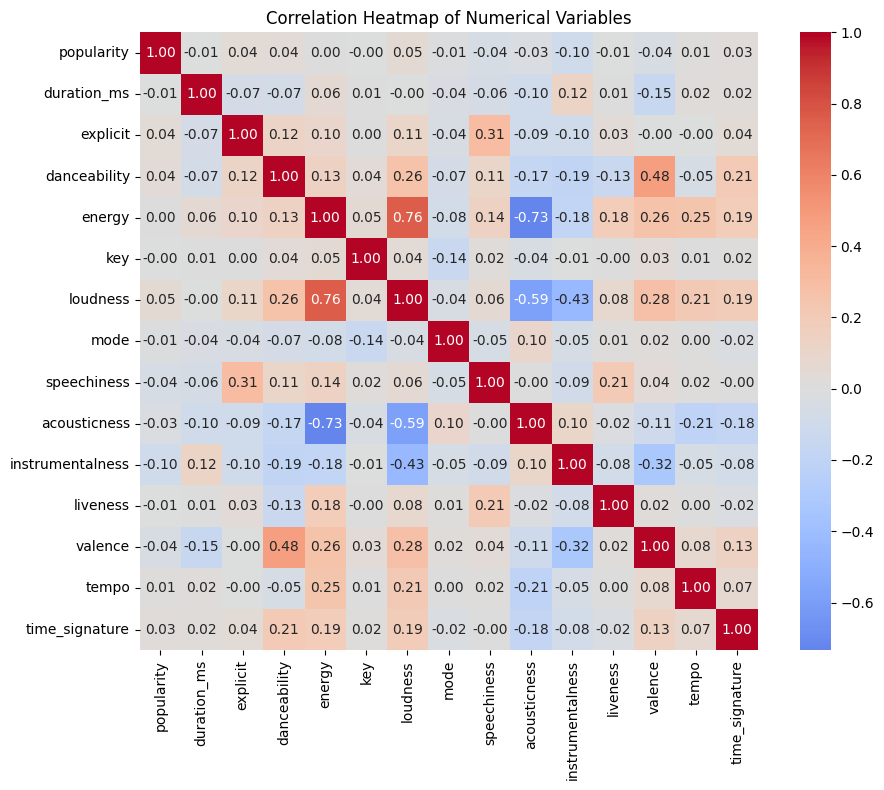

In [13]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

In [16]:
# Find number of unique artists
num_unique_artists = df['artists'].nunique()
print(f"Number of unique artists: {num_unique_artists}")

# Create a table of genres
genre_table = df['track_genre'].value_counts().to_frame(name='count')
print("\nGenre Distribution:")
print(genre_table)

Number of unique artists: 31437

Genre Distribution:
             count
track_genre       
acoustic      1000
afrobeat      1000
alt-rock      1000
alternative   1000
ambient       1000
...            ...
techno        1000
trance        1000
trip-hop      1000
turkish       1000
world-music   1000

[114 rows x 1 columns]


Candidate questions:

Investigating on audio closeness of songs, could make songlist from it / or think on more stuff this can contribute

“If someone likes this song, what else will they probably like (sonically)?”

“Can we build ‘song radio’ stations by vibe (energy/valence/tempo)?”

“How do genres overlap in audio space?”

“Can we detect mislabeled / inconsistent genre tags?”

What feature correlate with popularity

Which genres overlap most in audio space?

In [14]:
# To switch GitHub user:
# gh auth switch -u YOUR_USERNAME

# To check active authentication:
# gh auth status --active

